In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import cv2
import seaborn as sns


In [2]:
from sklearn.preprocessing import StandardScaler
# Load data
mnist = datasets.load_digits()
X = mnist.data
y = mnist.target

# Standardize the dataset using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# lets print the first digit as 8x8 matrix
print("First digit as an 8x8 matrix:")
print(X[0].reshape((8, 8)))

First digit as an 8x8 matrix:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [3]:
# Split the dataset into training and test sets
(X_train, X_test, y_train, y_test) = train_test_split(X_scaled, y, test_size=0.10, random_state=1)

# show the sizes of each data split
print("number of train samples: {}".format(len(X_train)))
print("number of test samples:: {}".format(len(X_test)))

number of train samples: 1617
number of test samples:: 180


In [4]:
from sklearn.linear_model import LogisticRegression
# Different LogisticRegression parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
best_accuracy = 0
best_params = {}
# Loop through each determined parameteres
for solver in solvers:
    model = LogisticRegression(solver=solver)
    model.fit(X_train, y_train)
    # Test and evaluate the model
    fx_test = model.predict(X_test)
    accuracy = accuracy_score(y_test, fx_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'solver': solver}
    print(f"Results for solver={solver}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{classification_report(y_test, fx_test)}")


Results for solver=newton-cg
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      0.95      0.95        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        18
           5       0.89      0.94      0.91        17
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        21
           8       1.00      0.93      0.97        15
           9       0.91      0.91      0.91        11

    accuracy                           0.98       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.98      0.98      0.98       180

Results for solver=lbfgs
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
  

In [5]:
# Print the best hyperparameters and accuracy
print("\nBest Hyperparameters:")
print(f"solver: {best_params['solver']}")
print(f"Best Accuracy: {best_accuracy:.2f}")


Best Hyperparameters:
solver: newton-cg
Best Accuracy: 0.98


In [6]:
# Evaluation with the best parameters
model = LogisticRegression(solver=best_params['solver'])
model.fit(X_train, y_train)
fx_test = model.predict(X_test)

In [7]:
cr = classification_report(y_test, fx_test)
print("Classification Report:\n\n{}" .format(cr))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      0.95      0.95        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        18
           5       0.89      0.94      0.91        17
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        21
           8       1.00      0.93      0.97        15
           9       0.91      0.91      0.91        11

    accuracy                           0.98       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.98      0.98      0.98       180



Confusion matrix


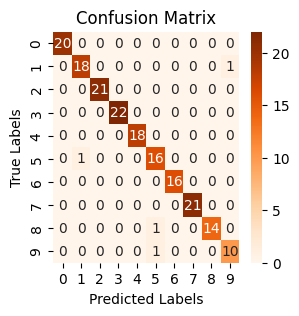

In [8]:
print ("Confusion matrix")
cm = confusion_matrix(y_test, fx_test)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=mnist.target_names, yticklabels=mnist.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

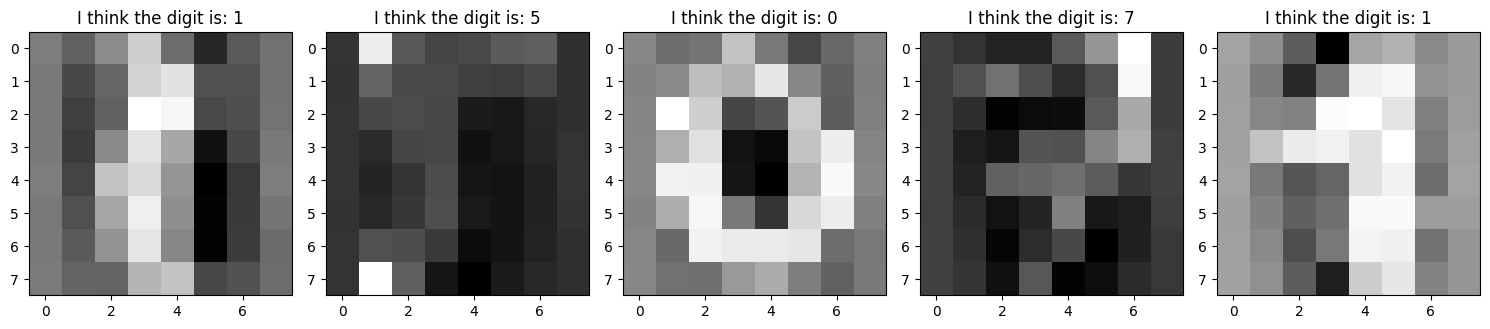

In [9]:
# Figure to hold subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # 1 row, 5 columns
axes = axes.flatten()
# visualize the first 5 digits and annotate them
for i in range(5):
         label = model.predict([X_test[i]])
         image = X_test[i].reshape((8,8))
         axes[i].imshow(image, cmap='gray')  # Images'll be shown in gray scale
         axes[i].set_title(f"I think the digit is: {label[0]}", fontsize=12)  
         cv2.waitKey(0)
# Show the plot
plt.tight_layout()
plt.show()